In [1]:
import matplotlib.pyplot as plt
%matplotlib inline #直接显示生成的图表
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [8]:
data = pd.read_csv('/home/aw10279/Desktop/share/Folds5x2_pp.csv')

In [44]:
data.head() # 显示头5行

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [45]:
data.shape # 显示数据尺寸

(9568, 5)

In [12]:
X = data[['AT','V','AP','RH']]
y = data['PE']

In [15]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#train_test_split用于将样本随机划分训练集和测试集，test_size为测试集占比，默认0.25，写整数为具体数量；random_state随机种子

/home/aw10279/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print (linreg.intercept_)
print (linreg.coef_)

453.7374863490441
[-1.98551612 -0.22963216  0.06295463 -0.15937156]


In [46]:
y_pred = linreg.predict(X_test)

from sklearn import metrics
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))  # 用scikit-learn计算MSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)) ) # 用scikit-learn计算RMSE

'''对比各组结果的这两个数值，判断哪组数据更好'''

MSE: 19.959498634674773
RMSE: 4.46760546989937


'对比各组结果的这两个数值，判断哪组数据更好'

In [28]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)  # 用10折交叉验证优化模型

print ("MSE:",metrics.mean_squared_error(y, predicted))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

'''此处比上面的均方误差还要大，是因为交叉验证会将所有部分的样本依次作为测试集，最后取平均值，自然比上面只用一部分的大一些'''

MSE: 20.79559746194311
RMSE: 4.560219014690316


'此处比上面的均方误差还要大，是因为交叉验证会将所有部分的样本依次作为测试集，最后取平均值，自然比上面只用一部分的大一些'

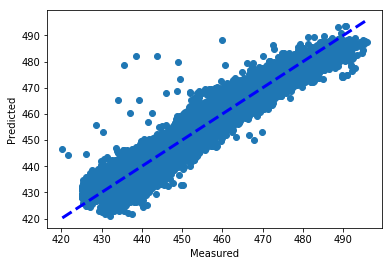

In [41]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)  # 用实际值和预测值画点，比较偏离程度。越集中在对角线就越准确
# 画对角线，前两个参数为横纵坐标取值，第三个是颜色和样式(r,g,b,k)，lw是粗细
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=3)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()